In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/kf/4mbvx4jx6jl2h4j6258cj1vm0000gn/T/ipykernel_38285/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Path to your CSV file
file_path = '/Users/sampass/Desktop/IMC Trade Comp/Derivative Strat/Stuff/7967dd9e-ce25-4a3f-83f3-6436994e851a.csv'

# Load the CSV file
data = pd.read_csv(file_path, delimiter=';')

# Creating separate DataFrames for each tradable instrument: Amethysts and Starfruit
amethysts_data = data[data['product'] == 'AMETHYSTS'].copy()
starfruit_data = data[data['product'] == 'STARFRUIT'].copy()

# Setting the 'timestamp' column as the index and keeping only the required columns
amethysts_data.set_index('timestamp', inplace=True)
starfruit_data.set_index('timestamp', inplace=True)

amethysts_data = amethysts_data[['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price']]
starfruit_data = starfruit_data[['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price']]

starfruit_data.to_csv('starfruit.csv')
amethysts_data.to_csv('amethysts.csv')

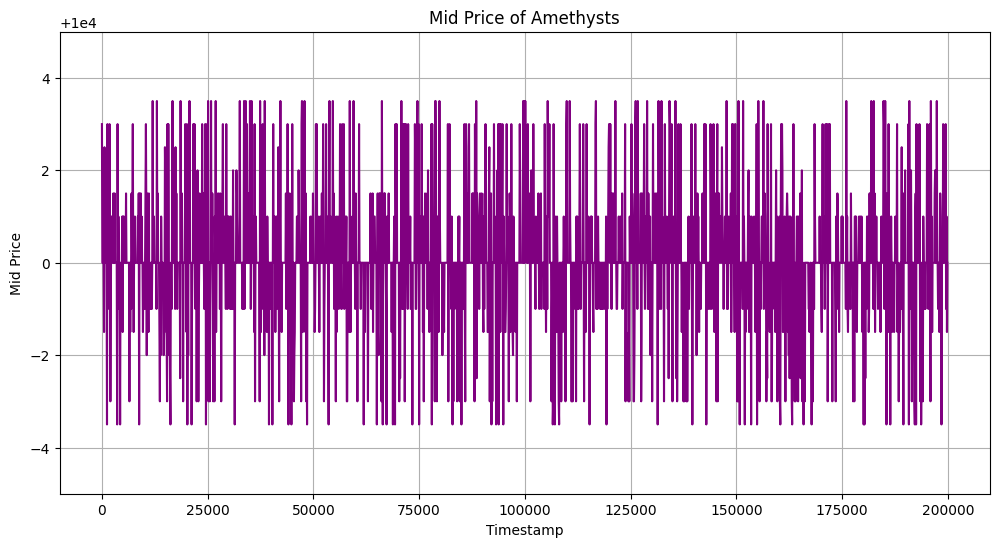

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(amethysts_data.index, amethysts_data['mid_price'], color='purple')
plt.title('Mid Price of Amethysts')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.ylim(9995, 10005)  # Setting the y-axis limits to start at 0 and end a bit above the max value
plt.grid(True)
plt.show()

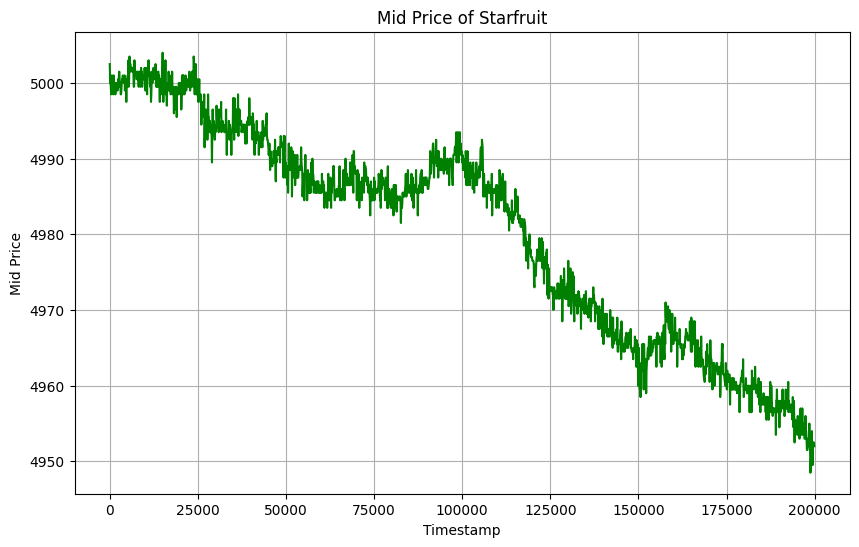

In [4]:
# Plot for Starfruit
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['mid_price'], color='green')
plt.title('Mid Price of Starfruit')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.grid(True)
plt.show()

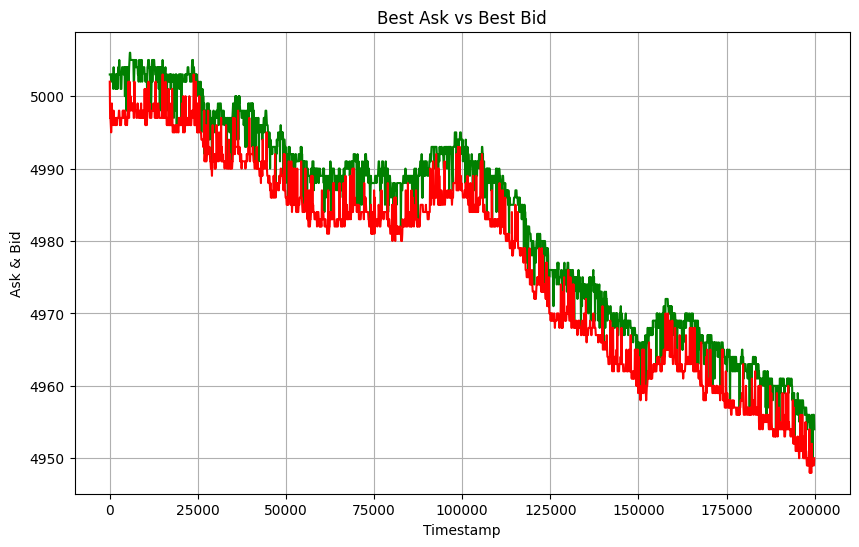

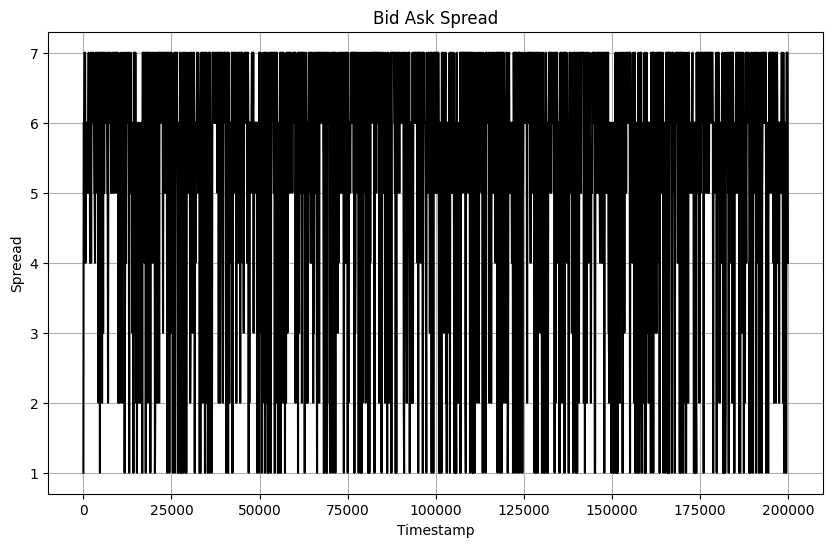

In [5]:
best_ask = starfruit_data['ask_price_1']
best_bid = starfruit_data['bid_price_1']
bid_ask_spread = best_ask - best_bid
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['ask_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['bid_price_1'], color='red')
plt.title('Best Ask vs Best Bid')
plt.xlabel('Timestamp')
plt.ylabel('Ask & Bid')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, bid_ask_spread, color='black')
plt.title('Bid Ask Spread')
plt.xlabel('Timestamp')
plt.ylabel('Spreead')
plt.grid(True)
plt.show()

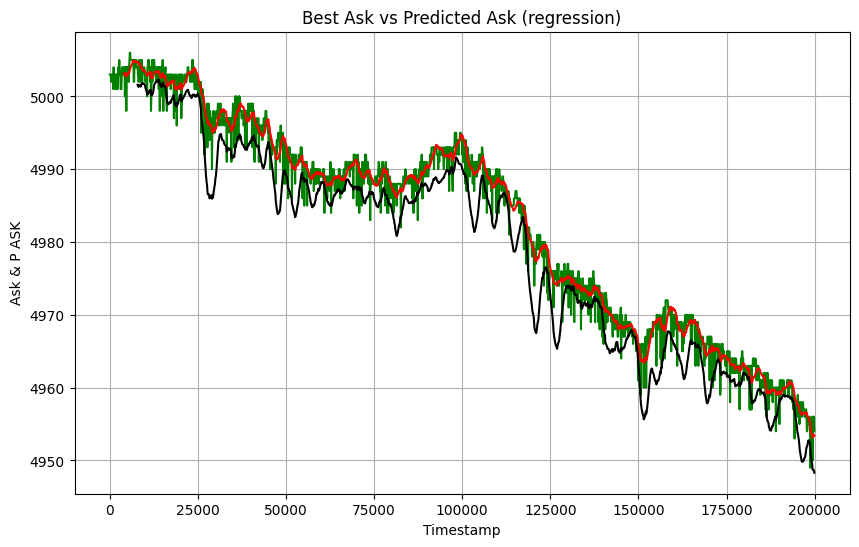

In [6]:
def linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    b = y_mean - m * X_mean
    return m, b

starfruit_data['m'] = np.nan
starfruit_data['b'] = np.nan
starfruit_data['predicted_best_ask'] = np.nan
for i in range(len(starfruit_data)):
        if i >= 40:
            X = starfruit_data.index[i-40:i+1]
            y = starfruit_data['ask_price_1'].iloc[i-40:i+1].values
            m, b = linear_regression(X, y)

            predicted_price = m * X[-1] + b

            starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = m
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = b
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_ask')] = predicted_price
        else:
            # For the first 20 days, we don't perform regression
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = np.nan
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = np.nan
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_ask')] = np.nan

window_size = 40
starfruit_data['predicted_best_ask_rolling_std'] = starfruit_data['predicted_best_ask'].rolling(window=window_size).std()
starfruit_data['predicted_best_ask_lower_band'] = starfruit_data['predicted_best_ask'] - (starfruit_data['predicted_best_ask_rolling_std'] * 4.0)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['ask_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['predicted_best_ask'], color='red')
plt.plot(starfruit_data.index, starfruit_data['predicted_best_ask_lower_band'], color='black')
plt.title('Best Ask vs Predicted Ask (regression)')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

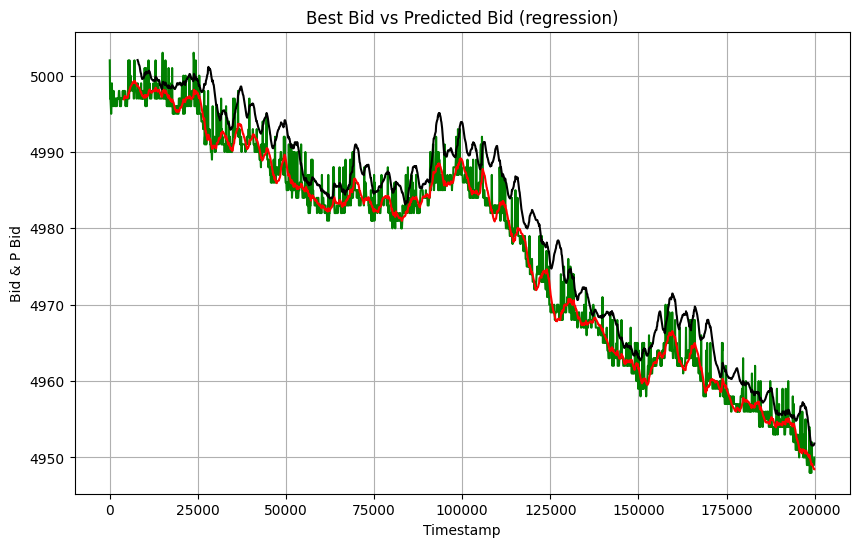

In [7]:
def linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    b = y_mean - m * X_mean
    return m, b

starfruit_data['m'] = np.nan
starfruit_data['b'] = np.nan
starfruit_data['predicted_best_bid'] = np.nan
for i in range(len(starfruit_data)):
        if i >= 40:
            X = starfruit_data.index[i-40:i+1]
            y = starfruit_data['bid_price_1'].iloc[i-40:i+1].values
            m, b = linear_regression(X, y)

            predicted_price = m * X[-1] + b

            starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = m
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = b
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_bid')] = predicted_price
        else:
            # For the first 20 days, we don't perform regression
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = np.nan
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = np.nan
            starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_bid')] = np.nan

window_size = 40
starfruit_data['predicted_best_bid_rolling_std'] = starfruit_data['predicted_best_bid'].rolling(window=window_size).std()
starfruit_data['predicted_best_bid_upper_band'] = starfruit_data['predicted_best_bid'] + (starfruit_data['predicted_best_bid_rolling_std'] * 4.0)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['bid_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['predicted_best_bid'], color='red')
plt.plot(starfruit_data.index, starfruit_data['predicted_best_bid_upper_band'], color='black')
plt.title('Best Bid vs Predicted Bid (regression)')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

In [8]:
daily_returns = []
trade_log = []
position_open = False
position_type = None

for timestamp, row in starfruit_data.iloc[1:].iterrows():
    best_bid_price = row['bid_price_1']
    best_ask_price = row['ask_price_1']

    lower_band_value = row['predicted_best_ask_lower_band']
    upper_band_value = row['predicted_best_bid_upper_band']
    ask_mean = row['predicted_best_ask']
    bid_mean = row['predicted_best_bid']
    live_ask = row['ask_price_1']
    live_bid = row['bid_price_1']
    
    if live_ask < lower_band_value and not position_open:
        # Open long position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = True
        position_type = 'Long'

    elif live_bid > upper_band_value and not position_open:
        # Open short position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = True
        position_type = 'Short'
    
    elif live_bid > upper_band_value and position_open and position_type == 'Long':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = False
        
    elif live_ask < lower_band_value and position_open and position_type == 'Short':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = False

# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

In [9]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and open_position is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
        
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print('Number of trades ', i)

Total return from strategy: 182.0
Number of trades  82


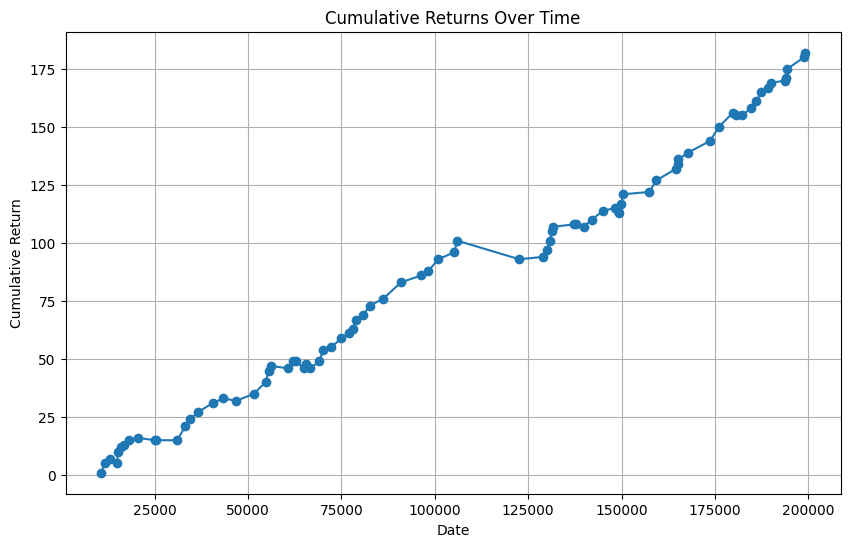

In [10]:
profit_loss_df['Cumulative Return'] = profit_loss_df['Profit/Loss'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(profit_loss_df['Cumulative Return'], marker='o')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

In [20]:
best_total_return = -float('inf')
best_window_size = None
best_std_multiplier = None

for window_size in range(5, 41):
    for std_multiplier in [x * 0.1 for x in range(5, 41)]:
        # Recalculate Bollinger Bands with current window_size and std_multiplier
        def linear_regression(X, y):
            X_mean = np.mean(X)
            y_mean = np.mean(y)
            m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
            b = y_mean - m * X_mean
            return m, b
        
        starfruit_data['m'] = np.nan
        starfruit_data['b'] = np.nan
        starfruit_data['predicted_best_bid'] = np.nan
        for i in range(len(starfruit_data)):
                if i >= window_size:
                    X = starfruit_data.index[i-window_size:i+1]
                    y = starfruit_data['bid_price_1'].iloc[i-window_size:i+1].values
                    m, b = linear_regression(X, y)
                    predicted_price = m * X[-1] + b
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = m
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = b
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_bid')] = predicted_price
                else:
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = np.nan
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = np.nan
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_bid')] = np.nan
        starfruit_data['predicted_best_bid_rolling_std'] = starfruit_data['predicted_best_bid'].rolling(window=window_size).std()
        starfruit_data['predicted_best_bid_upper_band'] = starfruit_data['predicted_best_bid'] + (starfruit_data['predicted_best_bid_rolling_std'] * std_multiplier)

        starfruit_data['m'] = np.nan
        starfruit_data['b'] = np.nan
        starfruit_data['predicted_best_ask'] = np.nan
        for i in range(len(starfruit_data)):
                if i >= window_size:
                    X = starfruit_data.index[i-window_size:i+1]
                    y = starfruit_data['ask_price_1'].iloc[i-window_size:i+1].values
                    m, b = linear_regression(X, y)
                    predicted_price = m * X[-1] + b
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = m
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = b
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_ask')] = predicted_price
                else:
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('m')] = np.nan
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('b')] = np.nan
                    starfruit_data.iloc[i, starfruit_data.columns.get_loc('predicted_best_ask')] = np.nan
        starfruit_data['predicted_best_ask_rolling_std'] = starfruit_data['predicted_best_ask'].rolling(window=window_size).std()
        starfruit_data['predicted_best_ask_lower_band'] = starfruit_data['predicted_best_ask'] - (starfruit_data['predicted_best_ask_rolling_std'] * std_multiplier)



        daily_returns = []
        trade_log = []
        position_open = False
        position_type = None
        
        for timestamp, row in starfruit_data.iloc[1:].iterrows():
            best_bid_price = row['bid_price_1']
            best_ask_price = row['ask_price_1']
        
            lower_band_value = row['predicted_best_ask_lower_band']
            upper_band_value = row['predicted_best_bid_upper_band']
            ask_mean = row['predicted_best_ask']
            bid_mean = row['predicted_best_bid']
            live_ask = row['ask_price_1']
            live_bid = row['bid_price_1']
            
            if live_ask < lower_band_value and not position_open:
                # Open long position
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Open Position',
                    'Type': 'Long',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
                position_open = True
                position_type = 'Long'
        
            elif live_bid > upper_band_value and not position_open:
                # Open short position
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Open Position',
                    'Type': 'Short',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
                position_open = True
                position_type = 'Short'
            
            elif live_bid > upper_band_value and position_open and position_type == 'Long':
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Close Position',
                    'Type': 'Long',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
                position_open = False
                
            elif live_ask < lower_band_value and position_open and position_type == 'Short':
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Close Position',
                    'Type': 'Short',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
                position_open = False

        trade_log_df = pd.DataFrame(trade_log)
        trade_log_df.to_csv('tradelog.csv')
        total_return = 0
        open_position = None
        close_position_dates = []
        close_position_returns = []
        for index, trade in trade_log_df.iterrows():
            if trade['Action'] == 'Open Position':
                open_position = trade
            elif trade['Action'] == 'Close Position' and open_position is not None:
                close_position = trade
                close_position_dates.append(trade['Date'])
                if open_position['Type'] == 'Long':
                    profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
                elif open_position['Type'] == 'Short':
                    profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
                total_return += profit_loss
                close_position_returns.append(profit_loss)
                open_position = None
        profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
        profit_loss_df.to_csv('returns.csv')

        # Update the best parameters and return if current return is better
        if total_return > best_total_return:
            best_total_return = total_return
            best_window_size = window_size
            best_std_multiplier = std_multiplier

# After the loops
print(f"Best rolling window size: {best_window_size}, Best std multiplier: {best_std_multiplier}, Best total return: {best_total_return}")

Best rolling window size: 13, Best std multiplier: 3.1, Best total return: 251.0


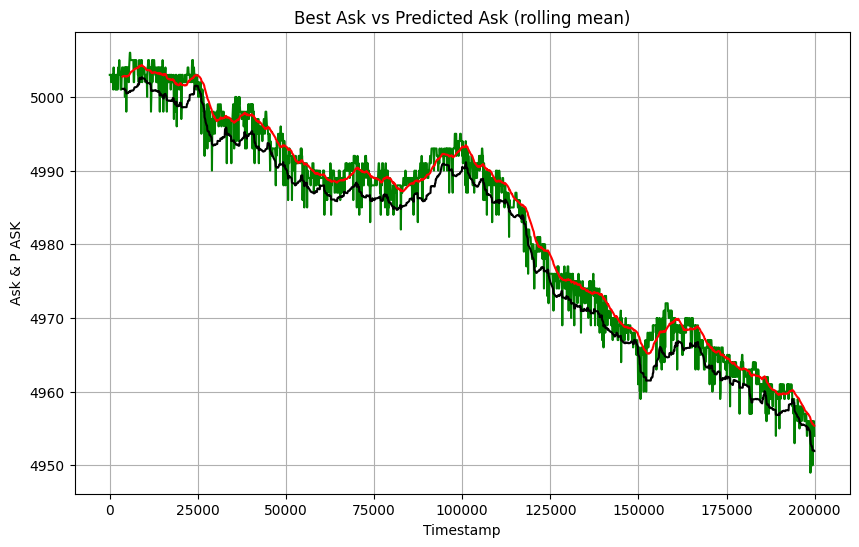

In [11]:
window_size = 37
starfruit_data['ask_price_1_rolling_mean'] = starfruit_data['ask_price_1'].rolling(window=window_size).mean()
starfruit_data['ask_price_1_rolling_std'] = starfruit_data['ask_price_1'].rolling(window=window_size).std()
starfruit_data['ask_price_1_lower_band'] = starfruit_data['ask_price_1_rolling_mean'] - (starfruit_data['ask_price_1_rolling_std'] * 1.6)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['ask_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['ask_price_1_rolling_mean'], color='red')
plt.plot(starfruit_data.index, starfruit_data['ask_price_1_lower_band'], color='black')
plt.title('Best Ask vs Predicted Ask (rolling mean)')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

timestamp
0                 NaN
100               NaN
200               NaN
300               NaN
400               NaN
             ...     
199500    4953.830398
199600    4953.795828
199700    4953.269773
199800    4953.225862
199900    4953.191231
Name: bid_price_1_upper_band, Length: 2000, dtype: float64


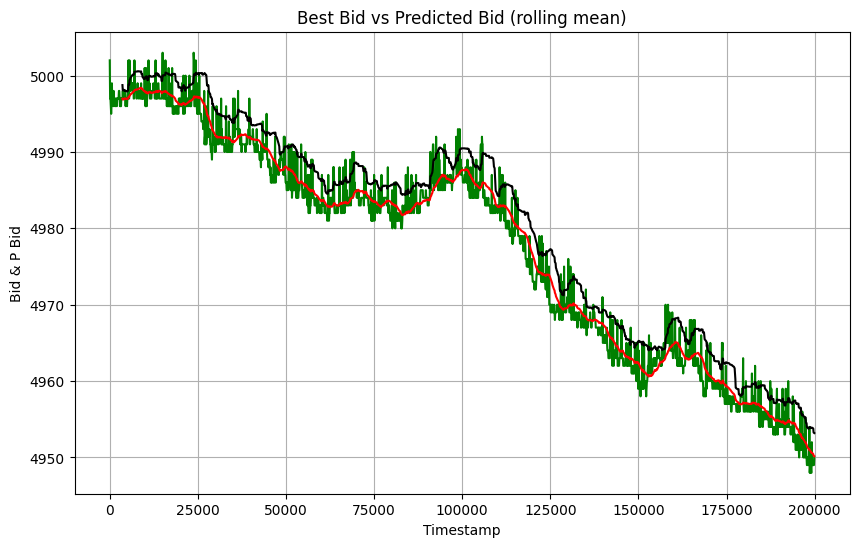

In [12]:
window_size = 37
starfruit_data['bid_price_1_rolling_mean'] = starfruit_data['bid_price_1'].rolling(window=window_size).mean()
starfruit_data['bid_price_1_rolling_std'] = starfruit_data['bid_price_1'].rolling(window=window_size).std()
starfruit_data['bid_price_1_upper_band'] = starfruit_data['bid_price_1_rolling_mean'] + (starfruit_data['bid_price_1_rolling_std'] * 1.6)
print(starfruit_data['bid_price_1_upper_band'])

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['bid_price_1'], color='green')
plt.plot(starfruit_data.index, starfruit_data['bid_price_1_rolling_mean'], color='red')
plt.plot(starfruit_data.index, starfruit_data['bid_price_1_upper_band'], color='black')
plt.title('Best Bid vs Predicted Bid (rolling mean)')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

In [13]:
daily_returns = []
trade_log = []
position_open = False
position_type = None

for timestamp, row in starfruit_data.iloc[1:].iterrows():
    best_bid_price = row['bid_price_1']
    best_ask_price = row['ask_price_1']

    lower_band_value = row['ask_price_1_lower_band']
    upper_band_value = row['bid_price_1_upper_band']
    ask_mean = row['ask_price_1_rolling_mean']
    bid_mean = row['bid_price_1_rolling_mean']
    live_ask = row['ask_price_1']
    live_bid = row['bid_price_1']
    
    if live_ask < lower_band_value and not position_open:
        # Open long position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = True
        position_type = 'Long'

    elif live_bid > upper_band_value and not position_open:
        # Open short position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = True
        position_type = 'Short'
    
    elif live_bid > upper_band_value and position_open and position_type == 'Long':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = False
        
    elif live_ask < lower_band_value and position_open and position_type == 'Short':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = False

# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

In [14]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and open_position is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
        
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print(i)

Total return from strategy: 261.0
105


In [18]:
best_total_return = -float('inf')
best_window_size = None
best_upper_std_multiplier = None
best_lower_std_multiplier = None

for window_size in range(10, 41):
    for upper_std_multiplier in [x * 0.1 for x in range(10, 45)]:
        for lower_std_multiplier_adjustment in [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]:
            # Recalculate Bollinger Bands with current window_size and std_multiplier
            lower_std_multiplier = upper_std_multiplier + lower_std_multiplier_adjustment
            starfruit_data['ask_price_1_rolling_mean'] = starfruit_data['ask_price_1'].rolling(window=window_size).mean()
            starfruit_data['ask_price_1_rolling_std'] = starfruit_data['ask_price_1'].rolling(window=window_size).std()
            starfruit_data['ask_price_1_lower_band'] = starfruit_data['ask_price_1_rolling_mean'] - (starfruit_data['ask_price_1_rolling_std'] * lower_std_multiplier)
            starfruit_data['bid_price_1_rolling_mean'] = starfruit_data['bid_price_1'].rolling(window=window_size).mean()
            starfruit_data['bid_price_1_rolling_std'] = starfruit_data['bid_price_1'].rolling(window=window_size).std()
            starfruit_data['bid_price_1_upper_band'] = starfruit_data['bid_price_1_rolling_mean'] + (starfruit_data['bid_price_1_rolling_std'] * upper_std_multiplier)
    
            # Calculate the total return for this iteration
            daily_returns = []
            trade_log = []
            position_open = False
            position_type = None
            
            for timestamp, row in starfruit_data.iloc[1:].iterrows():
                best_bid_price = row['bid_price_1']
                best_ask_price = row['ask_price_1']
            
                lower_band_value = row['ask_price_1_lower_band']
                upper_band_value = row['bid_price_1_upper_band']
                ask_mean = row['ask_price_1_rolling_mean']
                bid_mean = row['bid_price_1_rolling_mean']
                live_ask = row['ask_price_1']
                live_bid = row['bid_price_1']
                
                if live_ask < lower_band_value and not position_open:
                    # Open long position
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Open Position',
                        'Type': 'Long',
                        'Shares': 1,
                        'Price': best_ask_price,
                    })
                    position_open = True
                    position_type = 'Long'
            
                elif live_bid > upper_band_value and not position_open:
                    # Open short position
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Open Position',
                        'Type': 'Short',
                        'Shares': 1,
                        'Price': best_bid_price,
                    })
                    position_open = True
                    position_type = 'Short'
                
                elif live_bid > upper_band_value and position_open and position_type == 'Long':
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Close Position',
                        'Type': 'Long',
                        'Shares': 1,
                        'Price': best_bid_price,
                    })
                    position_open = False
                    
                elif live_ask < lower_band_value and position_open and position_type == 'Short':
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Close Position',
                        'Type': 'Short',
                        'Shares': 1,
                        'Price': best_ask_price,
                    })
                    position_open = False
            
            # Save the trade log to a DataFrame and then to a csv file
            trade_log_df = pd.DataFrame(trade_log)
            trade_log_df.to_csv('tradelog.csv')
            total_return = 0
            open_position = None
            close_position_dates = []
            close_position_returns = []
            for index, trade in trade_log_df.iterrows():
                if trade['Action'] == 'Open Position':
                    open_position = trade
                elif trade['Action'] == 'Close Position' and open_position is not None:
                    close_position = trade
                    close_position_dates.append(trade['Date'])
                    if open_position['Type'] == 'Long':
                        profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
                    elif open_position['Type'] == 'Short':
                        profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
                    total_return += profit_loss
                    close_position_returns.append(profit_loss)
                    open_position = None
            profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
            profit_loss_df.to_csv('returns.csv')

            # Update the best parameters and return if current return is better
            if total_return > best_total_return:
                best_total_return = total_return
                best_window_size = window_size
                best_upper_std_multiplier = upper_std_multiplier
                best_lower_std_multiplier = lower_std_multiplier

# After the loops
print(f"Best rolling window size: {best_window_size}, Best upper std multiplier: {best_upper_std_multiplier}, Best lower std multiplier: {best_lower_std_multiplier}, Best total return: {best_total_return}")

Best rolling window size: 37, Best upper std multiplier: 1.6, Best lower std multiplier: 1.6, Best total return: 261.0


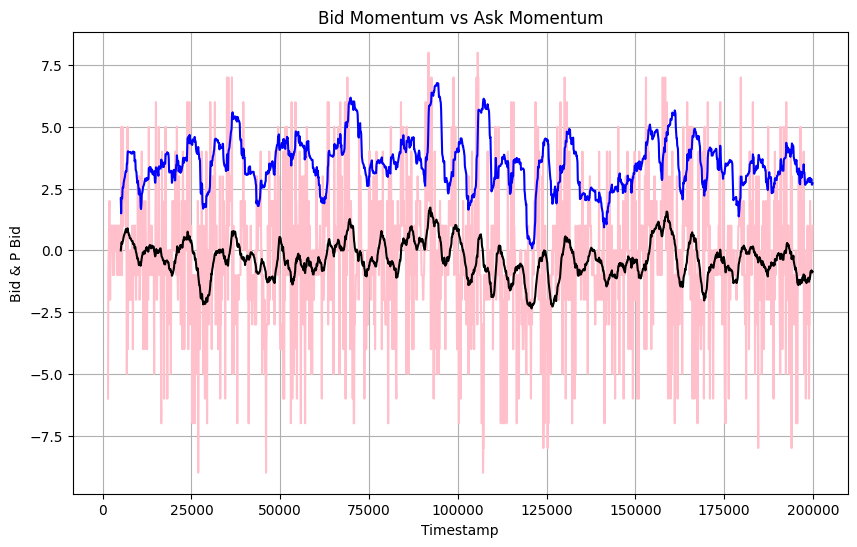

In [22]:

starfruit_data['ask_mom'] = starfruit_data['ask_price_1'] - starfruit_data['ask_price_1'].shift(15)
starfruit_data['ask_mom_rolling_mean'] = starfruit_data['ask_mom'].rolling(window=window_size).mean()
starfruit_data['ask_mom_rolling_std'] = starfruit_data['ask_mom'].rolling(window=window_size).std()
starfruit_data['ask_mom_lower_band'] = starfruit_data['ask_mom_rolling_mean'] - (starfruit_data['ask_mom_rolling_std'] * 1.6)

starfruit_data['bid_mom'] = starfruit_data['bid_price_1'] - starfruit_data['bid_price_1'].shift(15)
starfruit_data['bid_mom_rolling_mean'] = starfruit_data['bid_mom'].rolling(window=window_size).mean()
starfruit_data['bid_mom_rolling_std'] = starfruit_data['bid_mom'].rolling(window=window_size).std()
starfruit_data['bid_mom_upper_band'] = starfruit_data['bid_mom_rolling_mean'] + (starfruit_data['bid_mom_rolling_std'] * 1.6)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['bid_mom'], color='pink')
plt.plot(starfruit_data.index, starfruit_data['bid_mom_upper_band'], color='blue')
plt.plot(starfruit_data.index, starfruit_data['bid_mom_rolling_mean'], color='black')
plt.title('Bid Momentum vs Ask Momentum')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

In [16]:
daily_returns = []
trade_log = []
position_open = False
position_type = None

for timestamp, row in starfruit_data.iloc[1:].iterrows():
    best_bid_price = row['bid_price_1']
    best_ask_price = row['ask_price_1']
    live_ask_mom = row['ask_mom']
    live_bid_mom = row['bid_mom']
    lower_band_value = row['ask_mom_lower_band']
    upper_band_value = row['bid_mom_upper_band']
    ask_mean = row['ask_mom_rolling_mean']
    bid_mean = row['bid_mom_rolling_mean']
    live_ask = row['ask_price_1']
    live_bid = row['bid_price_1']
    
    if live_ask_mom < lower_band_value and not position_open:
        # Open long position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = True
        position_type = 'Long'

    elif live_bid_mom > upper_band_value and not position_open:
        # Open short position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = True
        position_type = 'Short'
    
    elif live_bid_mom > upper_band_value and position_open and position_type == 'Long':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = False
        
    elif live_ask_mom < lower_band_value and position_open and position_type == 'Short':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = False

# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

In [17]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and open_position is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
        
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print(i)

Total return from strategy: 212.0
82


In [34]:
best_total_return = -float('inf')
best_window_size = None
best_std_multiplier = None
best_shift = None

for window_size in range(5, 41):
    for std_multiplier in [x * 0.1 for x in range(10, 45)]:
        # for shift in range(5,25):
            # Recalculate Bollinger Bands with current window_size and std_multiplier
        starfruit_data['ask_mom'] = starfruit_data['ask_price_1'] - starfruit_data['ask_price_1'].shift(25)
        starfruit_data['ask_mom_rolling_mean'] = starfruit_data['ask_mom'].rolling(window=window_size).mean()
        starfruit_data['ask_mom_rolling_std'] = starfruit_data['ask_mom'].rolling(window=window_size).std()
        starfruit_data['ask_mom_lower_band'] = starfruit_data['ask_mom_rolling_mean'] - (starfruit_data['ask_mom_rolling_std'] * std_multiplier)
        
        starfruit_data['bid_mom'] = starfruit_data['bid_price_1'] - starfruit_data['bid_price_1'].shift(25)
        starfruit_data['bid_mom_rolling_mean'] = starfruit_data['bid_mom'].rolling(window=window_size).mean()
        starfruit_data['bid_mom_rolling_std'] = starfruit_data['bid_mom'].rolling(window=window_size).std()
        starfruit_data['bid_mom_upper_band'] = starfruit_data['bid_mom_rolling_mean'] + (starfruit_data['bid_mom_rolling_std'] * std_multiplier)

        daily_returns = []
        trade_log = []
        position_open = False
        position_type = None
        
        for timestamp, row in starfruit_data.iloc[1:].iterrows():
            best_bid_price = row['bid_price_1']
            best_ask_price = row['ask_price_1']
            live_ask_mom = row['ask_mom']
            live_bid_mom = row['bid_mom']
            lower_band_value = row['ask_mom_lower_band']
            upper_band_value = row['bid_mom_upper_band']
            ask_mean = row['ask_mom_rolling_mean']
            bid_mean = row['bid_mom_rolling_mean']
            live_ask = row['ask_price_1']
            live_bid = row['bid_price_1']
            
            if live_ask_mom < lower_band_value and not position_open:
                # Open long position
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Open Position',
                    'Type': 'Long',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
                position_open = True
                position_type = 'Long'
        
            elif live_bid_mom > upper_band_value and not position_open:
                # Open short position
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Open Position',
                    'Type': 'Short',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
                position_open = True
                position_type = 'Short'
            
            elif live_bid_mom > upper_band_value and position_open and position_type == 'Long':
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Close Position',
                    'Type': 'Long',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
                position_open = False
                
            elif live_ask_mom < lower_band_value and position_open and position_type == 'Short':
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Close Position',
                    'Type': 'Short',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
                position_open = False
        
        # Save the trade log to a DataFrame and then to a csv file
        trade_log_df = pd.DataFrame(trade_log)
        trade_log_df.to_csv('tradelog.csv')
        total_return = 0
        open_position = None
        close_position_dates = []
        close_position_returns = []
        for index, trade in trade_log_df.iterrows():
            if trade['Action'] == 'Open Position':
                open_position = trade
            elif trade['Action'] == 'Close Position' and open_position is not None:
                close_position = trade
                close_position_dates.append(trade['Date'])
                if open_position['Type'] == 'Long':
                    profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
                elif open_position['Type'] == 'Short':
                    profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
                total_return += profit_loss
                close_position_returns.append(profit_loss)
                open_position = None
        profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
        profit_loss_df.to_csv('returns.csv')

        # Update the best parameters and return if current return is better
        if total_return > best_total_return:
            best_total_return = total_return
            best_window_size = window_size
            # best_shift = shift
            best_std_multiplier = std_multiplier

# After the loops
print(f"Best rolling window size: {best_window_size}, Best std multiplier: {best_std_multiplier}, Best total return: {best_total_return}")

Best rolling window size: 19, Best std multiplier: 1.6, Best total return: 236.0


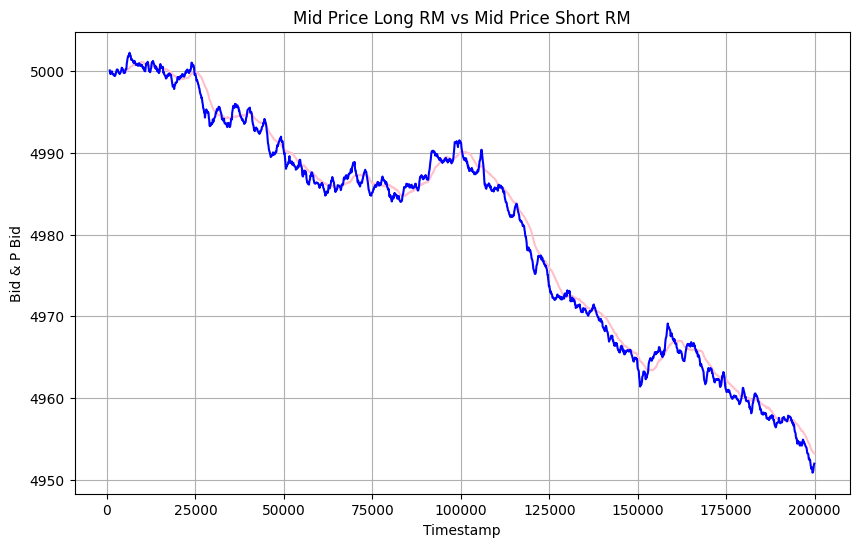

In [49]:

starfruit_data['mid_price_rolling_mean_long'] = starfruit_data['mid_price'].rolling(window=50).mean()
starfruit_data['mid_price_rolling_mean_short'] = starfruit_data['mid_price'].rolling(window=9).mean()
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['mid_price_rolling_mean_long'], color='pink')
plt.plot(starfruit_data.index, starfruit_data['mid_price_rolling_mean_short'], color='blue')
plt.title('Mid Price Long RM vs Mid Price Short RM')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

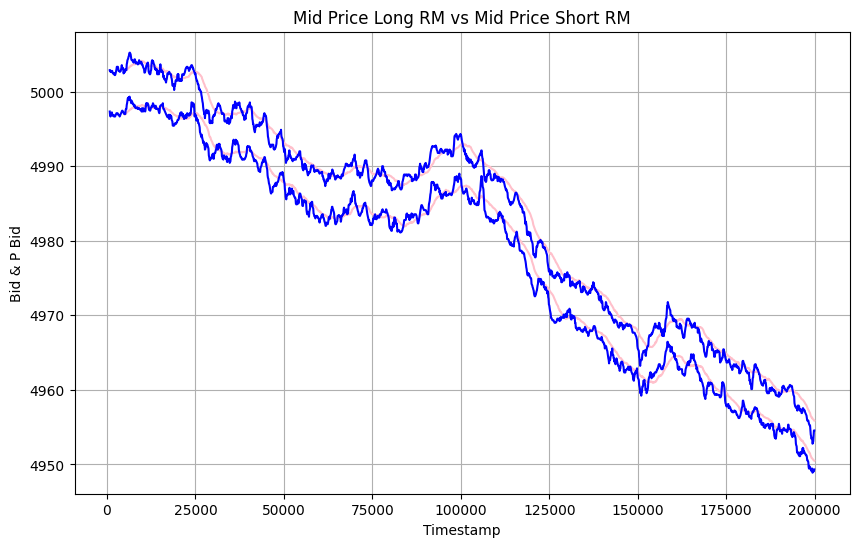

In [55]:
starfruit_data['ask_rolling_mean_long'] = starfruit_data['ask_price_1'].rolling(window=50).mean()
starfruit_data['ask_rolling_mean_short'] = starfruit_data['ask_price_1'].rolling(window=9).mean()
starfruit_data['bid_rolling_mean_long'] = starfruit_data['bid_price_1'].rolling(window=50).mean()
starfruit_data['bid_rolling_mean_short'] = starfruit_data['bid_price_1'].rolling(window=9).mean()
plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['ask_rolling_mean_long'], color='pink')
plt.plot(starfruit_data.index, starfruit_data['ask_rolling_mean_short'], color='blue')
plt.plot(starfruit_data.index, starfruit_data['bid_rolling_mean_long'], color='pink')
plt.plot(starfruit_data.index, starfruit_data['bid_rolling_mean_short'], color='blue')
plt.title('Mid Price Long RM vs Mid Price Short RM')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

In [50]:
trade_log = []

for i in range(1, len(starfruit_data)):
    row = starfruit_data.iloc[i]
    best_bid_price = row['bid_price_1']
    best_ask_price = row['ask_price_1']
    timestamp = starfruit_data.index[i]

    prev_long = starfruit_data['mid_price_rolling_mean_long'].iloc[i-1]
    curr_long = row['mid_price_rolling_mean_long']
    prev_short = starfruit_data['mid_price_rolling_mean_short'].iloc[i-1]
    curr_short = row['mid_price_rolling_mean_short']

    if prev_long < prev_short and curr_long >= curr_short:
        trade_log.append({
            'Date': timestamp,
            'Type': 'Sell',
            'Shares': 1,
            'Price': best_bid_price,
        })
    elif prev_long > prev_short and curr_long <= curr_short:
        trade_log.append({
            'Date': timestamp,
            'Type': 'Buy',
            'Shares': 1,
            'Price': best_ask_price,
        })

trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv', index=False)

In [51]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
number_of_trades = 0

for index, trade in trade_log_df.iterrows():
    if trade['Type'] == 'Buy':
        # Open position
        if open_position is None:
            open_position = trade
            number_of_trades += 1
    elif trade['Type'] == 'Sell' and open_position is not None:
        # Close position
        close_position = trade
        close_position_dates.append(trade['Date'])

        # Calculate profit or loss
        profit_loss = (trade['Price'] - open_position['Price']) * trade['Shares']
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame({'Profit/Loss': close_position_returns}, index=close_position_dates)
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print(f"Number of completed trades: {number_of_trades}")

Total return from strategy: -336.0
Number of completed trades: 48


In [53]:
best_total_return = -float('inf')
best_window_size_long = None
best_window_size_short = None

for window_size_long in range(20, 61):
    for window_size_short in range(1, 21):
        starfruit_data['mid_price_rolling_mean_long'] = starfruit_data['mid_price'].rolling(window=window_size_long).mean()
        starfruit_data['mid_price_rolling_mean_short'] = starfruit_data['mid_price'].rolling(window=window_size_short).mean()

        daily_returns = []
        trade_log = []

        for i in range(1, len(starfruit_data)):
            row = starfruit_data.iloc[i]
            best_bid_price = row['bid_price_1']
            best_ask_price = row['ask_price_1']
            timestamp = starfruit_data.index[i]
        
            prev_long = starfruit_data['mid_price_rolling_mean_long'].iloc[i-1]
            curr_long = row['mid_price_rolling_mean_long']
            prev_short = starfruit_data['mid_price_rolling_mean_short'].iloc[i-1]
            curr_short = row['mid_price_rolling_mean_short']
        
            if prev_long > prev_short and curr_long <= curr_short:
                trade_log.append({
                    'Date': timestamp,
                    'Type': 'Sell',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
            elif prev_long < prev_short and curr_long >= curr_short:
                trade_log.append({
                    'Date': timestamp,
                    'Type': 'Buy',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
        
        trade_log_df = pd.DataFrame(trade_log)
        trade_log_df.to_csv('tradelog.csv', index=False)

        total_return = 0
        open_position = None
        close_position_dates = []
        close_position_returns = []
        number_of_trades = 0
        for index, trade in trade_log_df.iterrows():
            if trade['Type'] == 'Buy':
                if open_position is None:
                    open_position = trade
                    number_of_trades += 1
            elif trade['Type'] == 'Sell' and open_position is not None:
                close_position = trade
                close_position_dates.append(trade['Date'])
                profit_loss = (trade['Price'] - open_position['Price']) * trade['Shares']
                total_return += profit_loss
                close_position_returns.append(profit_loss)
                open_position = None
        profit_loss_df = pd.DataFrame({'Profit/Loss': close_position_returns}, index=close_position_dates)
        profit_loss_df.to_csv('returns.csv')

        if total_return > best_total_return:
            best_total_return = total_return
            best_window_size_long = window_size_long
            best_window_size_short = window_size_short

# After the loops
print(f"Best window size long: {best_window_size_long}, Best window size short: {best_window_size_short}, Best total return: {best_total_return}")

Best window size long: 20, Best window size short: 20, Best total return: 0


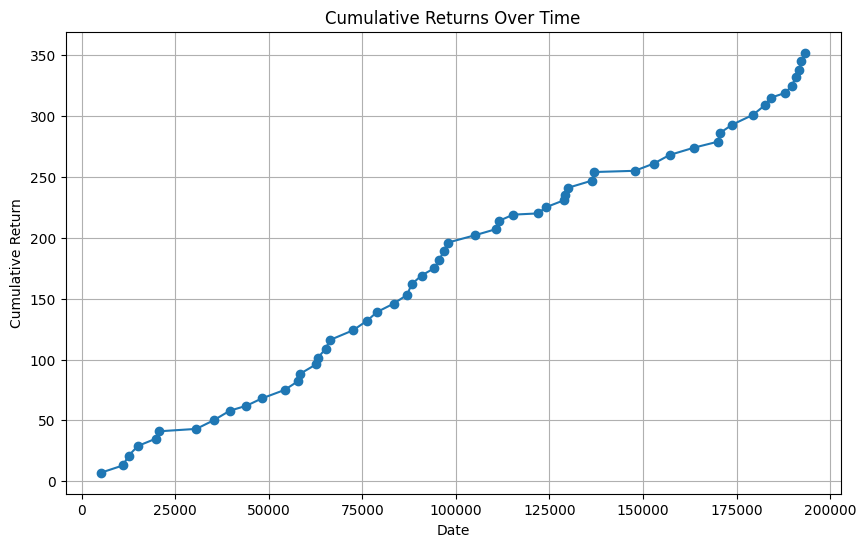

In [30]:
# Calculate cumulative returns
profit_loss_df['Cumulative Return'] = profit_loss_df['Profit/Loss'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(profit_loss_df['Cumulative Return'], marker='o')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

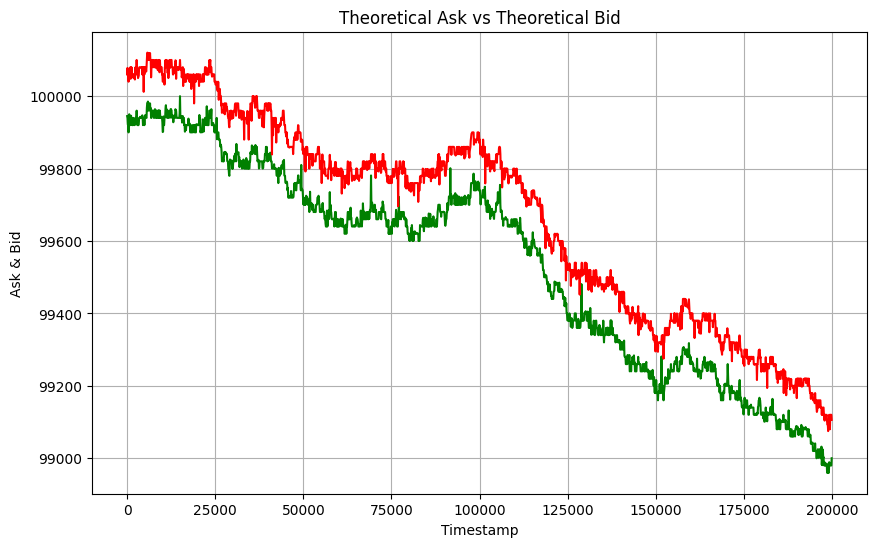

In [8]:
def calculate_value(row, price_prefix, volume_prefix):
    price_1 = row.get(f'{price_prefix}_price_1', 0) or 0
    volume_1 = row.get(f'{volume_prefix}_volume_1', 0) or 0
    price_2 = row.get(f'{price_prefix}_price_2', 0) or 0
    volume_2 = row.get(f'{volume_prefix}_volume_2', 0) or 0
    value = price_1 * min(volume_1, 20)
    if volume_1 < 20:
        value += price_2 * (20 - volume_1)
    return value
starfruit_data['calculated_bid_value'] = starfruit_data.apply(lambda row: calculate_value(row, 'bid', 'bid'), axis=1)
starfruit_data['calculated_ask_value'] = starfruit_data.apply(lambda row: calculate_value(row, 'ask', 'ask'), axis=1)
starfruit_data.to_csv('starfruit_data.csv')

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['calculated_bid_value'], color='green')
plt.plot(starfruit_data.index, starfruit_data['calculated_ask_value'], color='red')
plt.title('Theoretical Ask vs Theoretical Bid')
plt.xlabel('Timestamp')
plt.ylabel('Ask & Bid')
plt.grid(True)
plt.show()

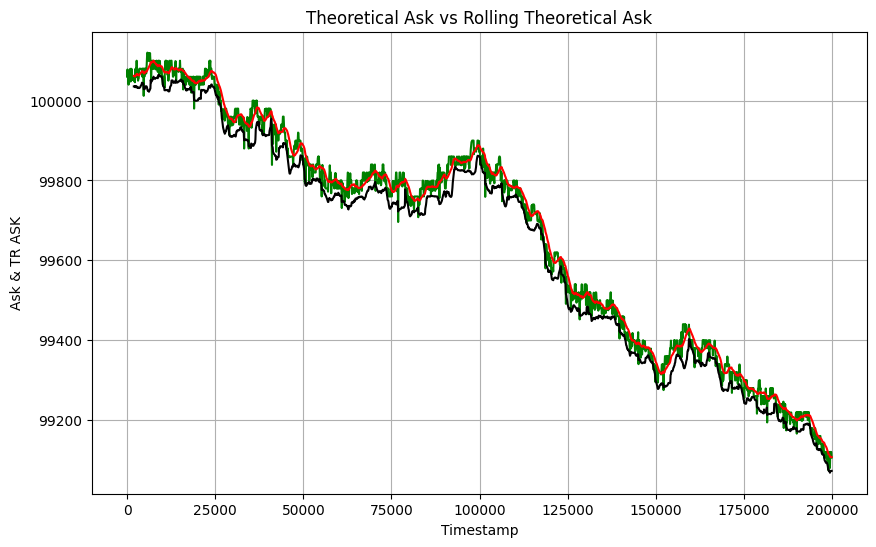

In [14]:
window_size = 20
starfruit_data['calculated_ask_value_rolling_mean'] = starfruit_data['calculated_ask_value'].rolling(window=window_size).mean()
starfruit_data['calculated_ask_value_rolling_std'] = starfruit_data['calculated_ask_value'].rolling(window=window_size).std()
starfruit_data['calculated_ask_value_lower_band'] = starfruit_data['calculated_ask_value_rolling_mean'] - (starfruit_data['calculated_ask_value_rolling_std'] * 2.3)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['calculated_ask_value'], color='green')
plt.plot(starfruit_data.index, starfruit_data['calculated_ask_value_rolling_mean'], color='red')
plt.plot(starfruit_data.index, starfruit_data['calculated_ask_value_lower_band'], color='black')
plt.title('Theoretical Ask vs Rolling Theoretical Ask')
plt.xlabel('Timestamp')
plt.ylabel('Ask & TR ASK')
plt.grid(True)
plt.show()

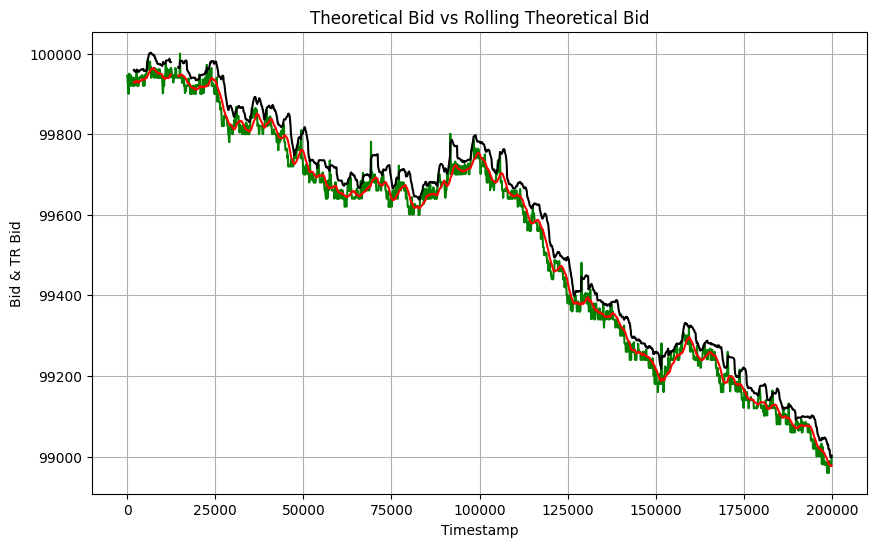

In [15]:
window_size = 20
starfruit_data['calculated_bid_value_rolling_mean'] = starfruit_data['calculated_bid_value'].rolling(window=window_size).mean()
starfruit_data['calculated_bid_value_rolling_std'] = starfruit_data['calculated_bid_value'].rolling(window=window_size).std()
starfruit_data['calculated_bid_value_upper_band'] = starfruit_data['calculated_bid_value_rolling_mean'] + (starfruit_data['calculated_bid_value_rolling_std'] * 2.3)

plt.figure(figsize=(10, 6))
plt.plot(starfruit_data.index, starfruit_data['calculated_bid_value'], color='green')
plt.plot(starfruit_data.index, starfruit_data['calculated_bid_value_rolling_mean'], color='red')
plt.plot(starfruit_data.index, starfruit_data['calculated_bid_value_upper_band'], color='black')
plt.title('Theoretical Bid vs Rolling Theoretical Bid')
plt.xlabel('Timestamp')
plt.ylabel('Bid & TR Bid')
plt.grid(True)
plt.show()

In [16]:
daily_returns = []
trade_log = []
position_open = False
position_type = None

for timestamp, row in starfruit_data.iloc[1:].iterrows():
    lower_band_value = row['calculated_ask_value_lower_band']
    upper_band_value = row['calculated_bid_value_upper_band']
    ask_mean = row['calculated_ask_value_rolling_mean']
    bid_mean = row['calculated_bid_value_rolling_mean']
    live_ask_1 = row['ask_price_1']
    live_ask_volume_1 = row['ask_volume_1']
    live_ask_2 = row['ask_price_2']
    live_ask_volume_2 = row['ask_volume_2']
    live_bid_1 = row['bid_price_1']
    live_bid_volume_1 = row['bid_volume_1']
    live_bid_2 = row['bid_price_2']
    live_bid_volume_2 = row['bid_volume_2']
    live_ask_value = row['calculated_ask_value']
    live_bid_value = row['calculated_bid_value']
    
    if live_ask_value < lower_band_value and not position_open:
        # Open long position
        shares_1 = min(live_ask_volume_1, 20)
        remainder = 20 - shares_1
        if live_ask_volume_2 < remainder:
            remainder = live_ask_volume_2
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Long',
            'Price 1': live_ask_1,
            'Shares 1': shares_1,
            'Price 2': live_ask_2,
            'Shares 2': remainder
        })
        position_open = True
        position_type = 'Long'

    elif live_bid_value > upper_band_value and not position_open:
        # Open short position
        shares_1 = min(live_bid_volume_1, 20)
        remainder = 20 - shares_1
        if live_bid_volume_2 < remainder:
            remainder = live_bid_volume_2
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Short',
            'Price 1': live_bid_1,
            'Shares 1': shares_1,
            'Price 2': live_bid_2,
            'Shares 2': remainder
        })
        position_open = True
        position_type = 'Short'
    
    elif live_bid_value > upper_band_value and position_open and position_type == 'Long':
        shares_1 = min(live_bid_volume_1, 20)
        remainder = 20 - shares_1
        if live_bid_volume_2 < remainder:
            remainder = live_bid_volume_2
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Long',
            'Price 1': live_bid_1,
            'Shares 1': shares_1,
            'Price 2': live_bid_2,
            'Shares 2': remainder
        })
        position_open = False
        
    elif live_ask_value < lower_band_value and position_open and position_type == 'Short':
        shares_1 = min(live_ask_volume_1, 20)
        remainder = 20 - shares_1
        if live_ask_volume_2 < remainder:
            remainder = live_ask_volume_2
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Short',
            'Price 1': live_ask_1,
            'Shares 1': shares_1,
            'Price 2': live_ask_2,
            'Shares 2': remainder
        })
        position_open = False

# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

In [37]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []
i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and open_position is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
        
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print(i)

Total return from strategy: 118.0
160


In [32]:
profit_loss_df = pd.read_csv('returns.csv')

daily_returns = profit_loss_df['Profit/Loss'] / 5000

average_daily_return = daily_returns.mean()

annual_risk_free_rate = 0.02

daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

excess_daily_returns = daily_returns - daily_risk_free_rate

std_dev_excess_daily_returns = excess_daily_returns.std()

sharpe_ratio = (excess_daily_returns.mean() / std_dev_excess_daily_returns) * (252 ** 0.5)

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 1.0936719360560838


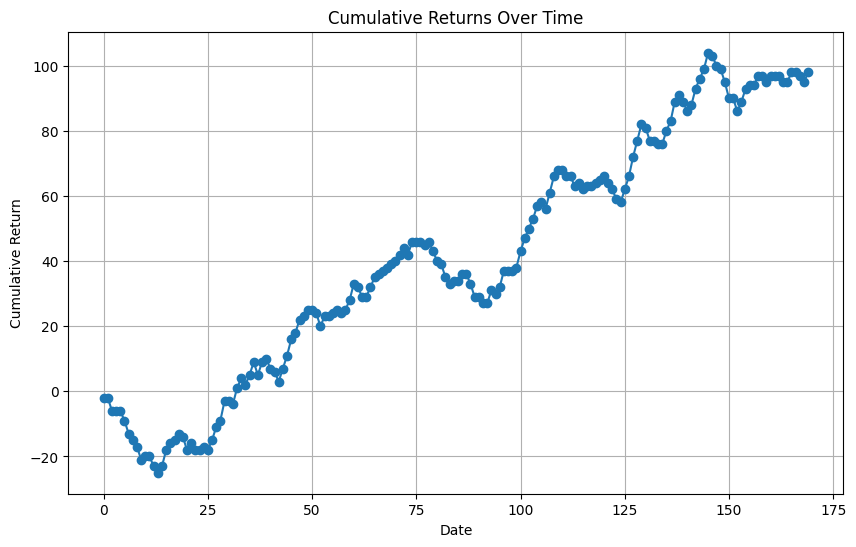

In [33]:
# Calculate cumulative returns
profit_loss_df['Cumulative Return'] = profit_loss_df['Profit/Loss'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(profit_loss_df['Cumulative Return'], marker='o')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

In [5]:
order_quantity = min(abs(-40), abs(-50), 19)
print(order_quantity)

19


In [6]:
print(-abs(order_quantity))

-19
